# Preguntas del enunciado

$C_{ij} = 
\begin{cases}
    -n_{ij} \hspace{1.4cm} i \neq j\\
    2 + n_{i} \hspace{1cm} i = j
\end{cases}
$

## 1. ¿Qué tipo de matriz resulta C?

La matriz de Colley resulta: 
1. **simétrica** [[1]](#1)  
    $C_{ij} = C_{ji}$ ya que la cantidad de partidos jugados entre $i,j$ es la misma que $j,i$. Luego $C = C^{t}$


2. **estricta diagonal dominante**  
    Por definición la matriz tiene en la diagonal los partidos jugados por el equipo $i$ ($n_i$) y en el resto los partidos jugados entre los equipos $i$, $j$ ($n_{ij}$).  
    Trivialmente pordemos ver que $n_{ij} \leq n_i$ ya que $\sum_{j \neq i}n_{ij} = n_i$  
    Luego $|C_{ii}| > \sum_{j \neq i}|C_{ji}| \ \ \forall i, j $ ya que a $n_i$ se le suma 2.

## 2. ¿Cómo se garantiza la aplicabilidad de EG sin intercambio de filas o columnas?

La matriz de Colley es una **matriz diagonal dominante**, luego según podemos ver en [[2]](#2) una propiedad de estas matrices es que no necesitan permutaciones para aplicar EG. **TODO: explicar esto mejor y (quizás) buscar una fuente que no sea wikipedia**

## 3. ¿Qué se puede decir sobre la estabilidad de los cálculos?

Que pueden llegar a ser muy inestables, debido a la aritmética finita de la computadora[3].

Un pequeño ejemplo:

$\begin{pmatrix}
    5 & -1 & -1 & -1 \\
    -1 & 4 & 0 & -1 \\
    -1 & 0 & 5 & -2 \\
    -1 & -1 & -2 & 6 \\
\end{pmatrix}$

Luego de correr EG debería quedar:

$\begin{pmatrix}
    5 & -1 & -1 & -1 \\
    0 & \frac{19}{5} & -\frac{1}{5} & -\frac{6}{5} \\
    0 & 0 & \frac{91}{19} & -\frac{43}{19} \\
    0 & 0 & 0 & \frac{396}{91} \\
\end{pmatrix}$

Pero por culpa de la falta de precisión de los double (**explicar mejor**) queda:

$\begin{pmatrix}
    5 & -1 & -1 & -1 \\
    0 & 3.8 & -0.2 & -1.2 \\
    0 & 0 & 4.78947 & -2.26316 \\
    0 & 0 & 0 & 4.35165 \\
\end{pmatrix}$

Se puede ver que $\frac{396}{91} \approxeq 4.351648352$ teniendo una diferencia de $0.00000165$ con $4.35165$.
Difieren poco pero es un caso chico, este error se podría repetir y acarrear terminando en un valor en esa posición y luego uno de ranking muy diferente al esperado.

## justificación de por qué funciona correctamente EG
Además, sabemos que existen casos donde el algoritmo EG no puede encontrar una
solución. Se debe incluir en el desarrollo una justificación sobre por qué el algoritmo
funciona correctamente en el caso del método CMM.

## Referencias
<a id="1">[1]</a> 
**Colley’s Bias Free College Football Ranking Method**, Wesley N. Colley (2002) Princeton University.

<a id="2">[2]</a> 
**<a href="https://en.wikipedia.org/wiki/Diagonally_dominant_matrix#Applications_and_properties">Wikipedia, Diagonally dominant Matrix</a>**

<a id="3">[3]</a> 
**<a href="https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html">What Every Computer Scientist Should Know About Floating-Point Arithmetic</a>** David Goldberg (1991)

# Codigo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import cho_factor, cho_solve

from scripts.utils import listfiles
from subprocess import *

%matplotlib inline

In [2]:
dataDirectory = "../data/" #.dat files
testsDirectory = "tests/" #.in files
completeTestsDirectory = "tests/test_completos/" #.in files
nuestrosTestsDirectory = "nuestrosTests/" #.in files

figOutputDirectory = "../informe/imagenes/"

executable = "./tp"

In [3]:
def runTp(input, output, algor):
    check_call([executable, input, output] + [algor], stdin=None, stdout=PIPE, stderr=PIPE)
    
def dataFiles():
    return list(listfiles(dataDirectory, "*.dat"))
        
def testsFiles():
    return list(listfiles(testsDirectory, "*.in"))

def completeTestsFiles():
    return list(listfiles(completeTestsDirectory, "*.in"))

### correr todos los casos para todos los algoritmos

In [4]:
#build
!python3 metnum.py build

opcionesAlgoritmos = [('CMM', '0'), ('WP', '1')]

for name, op in opcionesAlgoritmos:
    for finput in dataFiles() + testsFiles():
        foutput = finput.replace(".dat", f"_{name}.out").replace(".in", f"_{name}.out")
        runTp(finput, foutput, op)

### correr caso particular

In [13]:
# !python3 metnum.py build

# opcionesAlgoritmos = [('CMM', '0'), ('WP', '1')]
# data = pd.DataFrame()

# finput = dataDirectory + "casoscmm.dat"

# for name, op in opcionesAlgoritmos:
#     foutput = finput.replace(".dat", f"_{name}.out").replace(".in", f"_{name}.out")
#     runTp(finput, foutput, op)
#     res = pd.read_table(foutput, names=[name])
#     data[name] = res[name]
    
# data

# Experimentación

## Error absoluto por aritmética finita

### vs tests catedra

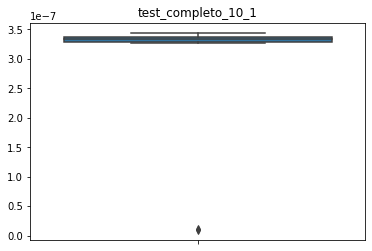

**test_completo_10_1** 
mean:2.7022695603395874e-07, median:3.340363850246053e-07, var:1.697803713119597e-14


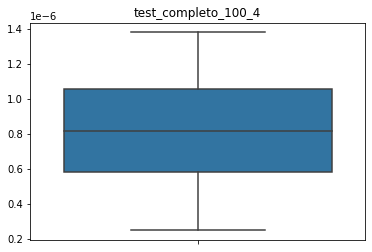

**test_completo_100_4** 
mean:8.263856107071366e-07, median:8.14856525033214e-07, var:9.012177928774187e-14


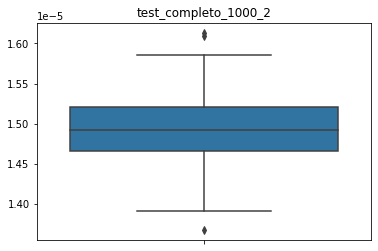

**test_completo_1000_2** 
mean:1.4932965938340648e-05, median:1.4922529980004873e-05, var:1.4017548880826774e-13


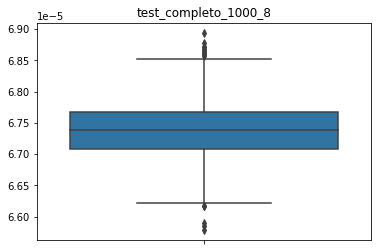

**test_completo_1000_8** 
mean:6.738384033064066e-05, median:6.737821289498624e-05, var:2.0533303574835325e-13


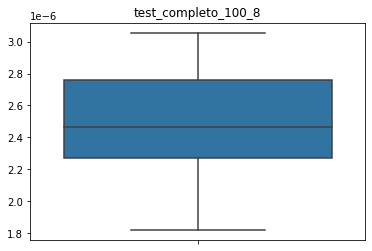

**test_completo_100_8** 
mean:2.497623989591857e-06, median:2.462933029939718e-06, var:9.779536734784769e-14


In [7]:
# vs tests de la catedra
error_abs = {}

for finput in completeTestsFiles():
    expected = pd.read_table(finput.replace(".in", ".expected"), names = ["expected"])
    output = pd.read_table(finput.replace(".in", ".out"), names = ["output"])

    data = pd.concat([expected, output], axis=1)
    dif = np.absolute(np.array(expected) - np.array(output)).flatten()

    testname = finput.split("/")[-1].replace(".in", "")
    cantEquipos = testname.split("_")[-2]
    
    error_abs[cantEquipos] = dif
    
    sns.boxplot(y=dif)
    plt.title(f"{testname}")
    
#     plt.axhline(y=np.median(dif), color='r', linestyle='--')
    
    plt.savefig(f"{figOutputDirectory}{testname}.png")
    plt.show()

    print(f"**{testname}** \nmean:{dif.mean()}, median:{np.median(dif)}, var:{dif.var()}")
#     print("\ndiferencias (ultimas 5)\n", dif[-5:])

# df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in error_abs.items() ]))

# sns.boxplot(data=df)
# plt.title(testname)
# plt.xlabel("Error absoluto contra tests catedra")
# plt.show()
        

### vs input propio

In [8]:
def readFileAndMakeCb(inputFilename):
    infile = open(inputFilename, 'r')
    cantEquipos, cantPartidos = [int(x) for x in infile.readline().replace("\n", "").split(" ")]

    c = [[0 for _ in range(cantEquipos)] for _ in range(cantEquipos)]
    b = [0 for _ in range(cantEquipos)]

    # hidratar sistema
    for line in infile:
        fecha, eq1, golesI, eq2, golesJ  = [int(x) for x in line.replace("\n", "").split(" ")]
        eqI = eq1-1 #indexs
        eqJ = eq2-1

        #c_ij = -n_ij
        c[eqI][eqJ] -= 1; 
        c[eqJ][eqI] -= 1;

        #c_ii = 2+ni
        c[eqI][eqI] += 1;
        c[eqJ][eqJ] += 1;

        if golesI > golesJ:
            b[eqI] += 1; #winner
            b[eqJ] -= 1; #loser
        else:
            b[eqI] -= 1; #loser
            b[eqJ] += 1; #winner

    for i in range(cantEquipos):
        b[i] = 1 + b[i]/2; #en b[i] estaba (wi - li)
        c[i][i] += 2; #en c[i][i] estaba ni (falta el +2)
    
    infile.close()
    return c, b

def solveWithCholesky(inputFilename):
    c, b = readFileAndMakeCb(inputFilename)
    A = np.array(c)

    c, low = cho_factor(A)
    x = cho_solve((c, low), b)

#     np.allclose(A @ x - b, np.zeros(len(b)))
    return x

#### bien diferente la diagonal

In [9]:
def jLibreSinoUltimo(eqI, aJugar, ultimo, pnro):
    faltanJugar = []
    for eqid, faltan in aJugar.items():
        if faltan > 0 and eqid != eqI:
            faltanJugar.append(eqid)
            
    if len(faltanJugar) > 0:
        return faltanJugar[pnro % len(faltanJugar)]
    else:
        return ultimo


cantEquipos = 10

outputFilename = f"{nuestrosTestsDirectory}bienDiferenteEnDiagonal_{cantEquipos}.in"
outfile = open(outputFilename, 'w')

aJugar = dict([(eqid, eqid) for eqid in range(1, cantEquipos+1)])
partidos = []


for eqI in range(1, cantEquipos):
    for pnro in range(aJugar[eqI]):
        eqJ = jLibreSinoUltimo(eqI, aJugar, cantEquipos, pnro)
#         print(f"{eqI} vs {eqJ}")
        partidos.append(f"1 {eqI} 1 {eqJ} 0")
        aJugar[eqI] -= 1
        aJugar[eqJ] -= 1
        
outfile.write(f"{cantEquipos} {len(partidos)}\n")
outfile.write("\n".join(partidos))
outfile.write("\n")
outfile.close()

# readFileAndMakeCb(outputFilename)[0] #show c

**test_completo_100_8** 
mean:2.3083253648456536e-07, median:2.0904496583762366e-07, var:3.398440086940386e-14
**bienDiferenteEnDiagonal_10** 
mean:8.067567558918539e-07, median:2.553734247956463e-07, var:1.6233130808092172e-12
**bienDiferenteEnDiagonal_100** 
mean:9.387924844474109e-07, median:3.0294706293565454e-07, var:1.8880552724758988e-12


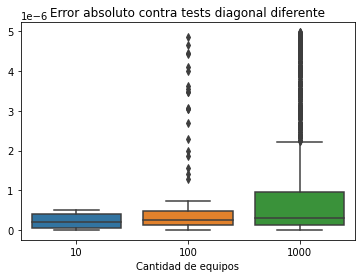

In [10]:
error_abs = {}

for cantEquipos in [10, 100, 1000]:
    finput = f"{nuestrosTestsDirectory}bienDiferenteEnDiagonal_{cantEquipos}.in"
    foutput = finput.replace(".in", ".out")

    runTp(finput, foutput, '0')

    expected = pd.DataFrame(solveWithCholesky(finput), columns = ["expected"])
    output = pd.read_table(foutput, names = ["output"])

    data = pd.concat([expected, output], axis=1)
    dif = np.absolute(np.array(expected) - np.array(output)).flatten()
    
    print(f"**{testname}** \nmean:{dif.mean()}, median:{np.median(dif)}, var:{dif.var()}")
#     print("\ndiferencias (ultimas 5)\n", dif[-5:])

    testname = finput.split("/")[-1].replace(".in", "")
    
    error_abs[cantEquipos] = dif

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in error_abs.items() ]))

sns.boxplot(data=df)
plt.title("Error absoluto contra tests diagonal diferente")
plt.xlabel("Cantidad de equipos")
plt.savefig(f"{figOutputDirectory}bienDiferenteEnDiagonal.png")
plt.show()

#### todos vs todos

In [11]:
for cantEquipos in [10, 50, 100, 500, 1000, 1500]:
    outputFilename = f"{nuestrosTestsDirectory}todosVsTodos_{cantEquipos}.in"
    outfile = open(outputFilename, 'w')

    partidos = []
    for eqI in range(1, cantEquipos):
        for eqJ in range(eqI+1, cantEquipos+1):
            partidos.append(f"1 {eqI} 1 {eqJ} 0")
            
    outfile.write(f"{cantEquipos} {len(partidos)}\n")
    outfile.write("\n".join(partidos))
    outfile.write("\n")
    outfile.close()

**bienDiferenteEnDiagonal_1000** 
mean:2.0000000010150786e-07, median:3.333333330468591e-07, var:2.6666666637299094e-14
**todosVsTodos_10** 
mean:2.2538461540815014e-07, median:2.307692306413589e-07, var:2.277692307875236e-14
**todosVsTodos_50** 
mean:2.2774509803223653e-07, median:2.1568627453505407e-07, var:2.2902066509739443e-14
**todosVsTodos_100** 
mean:2.2703410415450543e-07, median:2.2310755384835623e-07, var:2.3142313420591863e-14
**todosVsTodos_500** 
mean:2.328668275499463e-07, median:2.295409180508301e-07, var:2.4039178271082092e-14
**todosVsTodos_1000** 
mean:2.2762630451314041e-07, median:2.2237018257320607e-07, var:2.340011335586455e-14


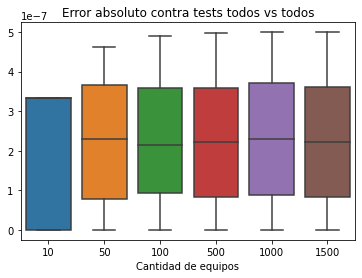

In [12]:
error_abs = {}

for cantEquipos in [10, 50, 100, 500, 1000, 1500]:
    finput = f"{nuestrosTestsDirectory}todosVsTodos_{cantEquipos}.in"
    foutput = finput.replace(".in", ".out")

    runTp(finput, foutput, '0')

    expected = pd.DataFrame(solveWithCholesky(finput), columns = ["expected"])
    output = pd.read_table(foutput, names = ["output"])

    data = pd.concat([expected, output], axis=1)
    dif = np.absolute(np.array(expected) - np.array(output)).flatten()
    
    print(f"**{testname}** \nmean:{dif.mean()}, median:{np.median(dif)}, var:{dif.var()}")
#     print("\ndiferencias (ultimas 5)\n", dif[-5:])

    testname = finput.split("/")[-1].replace(".in", "")
    
    error_abs[cantEquipos] = dif

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in error_abs.items() ]))

sns.boxplot(data=df)
plt.title("Error absoluto contra tests todos vs todos")
plt.xlabel("Cantidad de equipos")
plt.savefig(f"{figOutputDirectory}todosVsTodos.png")
plt.show()